In [4]:
import pandas as pd
lim=pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv") #reading the csv file
lim.head() #display the data in dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
lim.isnull() #checking for empty columns and rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
lim.shape #shape of the data

(7043, 21)

In [7]:
lim.info() # info of lim dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
lim["TotalCharges"] = pd.to_numeric(lim["TotalCharges"], errors='coerce') # converting totalcharges to numerical
lim["Churn"] = lim["Churn"].apply(lambda x : 1 if x == "Yes" else 0) # churn to 0 or 1 yes = 1 no = 0

In [9]:
print(lim['TotalCharges'])
print(lim['Churn'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [13]:
# function to print the category data and numerical data
def col(base, x=10, y=20):
    category_columns = [i for i in base.columns if base[i].dtypes == "O"]
    number_b_category = [i for i in base.columns if base[i].nunique() < x and base[i].dtypes != "O"]
    category_b_category = [i for i in base.columns if base[i].nunique() > y and base[i].dtypes == "O"]
    category_columns = category_columns + number_b_category
    category_columns = [i for i in category_columns if i not in category_b_category]
    number_columns = [i for i in base.columns if base[i].dtypes != "O"]
    number_columns = [i for i in number_columns if i not in number_b_category]
    print(f'category_columns: {len(category_columns)}')
    print(f'number_columns: {len(number_columns)}')
    print(f'category_and_category: {len(category_b_category)}')
    print(f'number_and_category: {len(number_b_category)}')
    return category_columns, number_columns, category_b_category
category_columns, number_columns, category_b_category = col(lim)

category_columns: 17
number_columns: 3
category_and_category: 1
number_and_category: 2


In [15]:
# detail and sumary about category columns
import matplotlib.pyplot as plt
import seaborn as sns
def category_d(base, name_c, plot=False):
    print(pd.DataFrame({name_c: base[name_c].value_counts(),"Ratio": 100 * base[name_c].value_counts() / len(base)}))
    if plot:
        sns.countplot(x=base[name_c], data=base)
        plt.show()
for i in category_columns:
    category_d(lim, i)

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


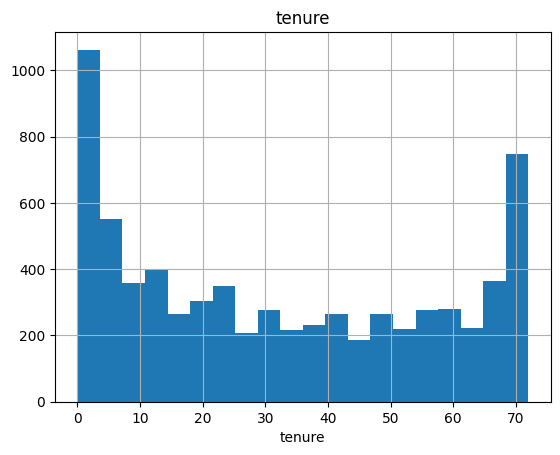

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


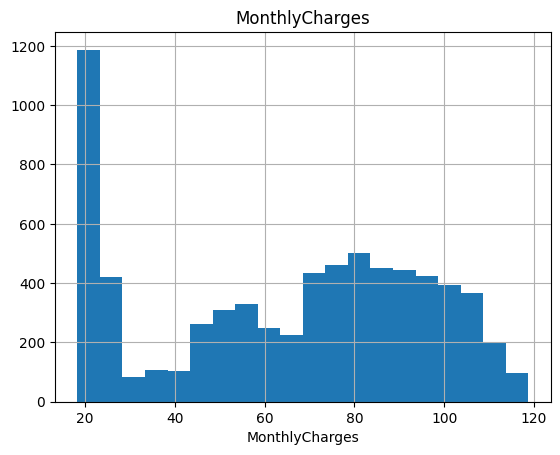

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


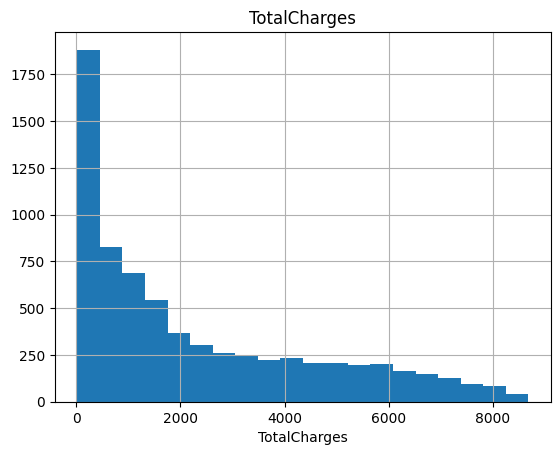

In [17]:
#detailed and summary about numerical columns data
def number_d(base, n_c, plot=False):
    q_r = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(base[n_c].describe(q_r).T)
    if plot:
        base[n_c].hist(bins=20)
        plt.xlabel(n_c)
        plt.title(n_c)
        plt.show()
for i in number_columns:
    number_d(lim, i, plot=True)

In [19]:
lim[number_columns].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


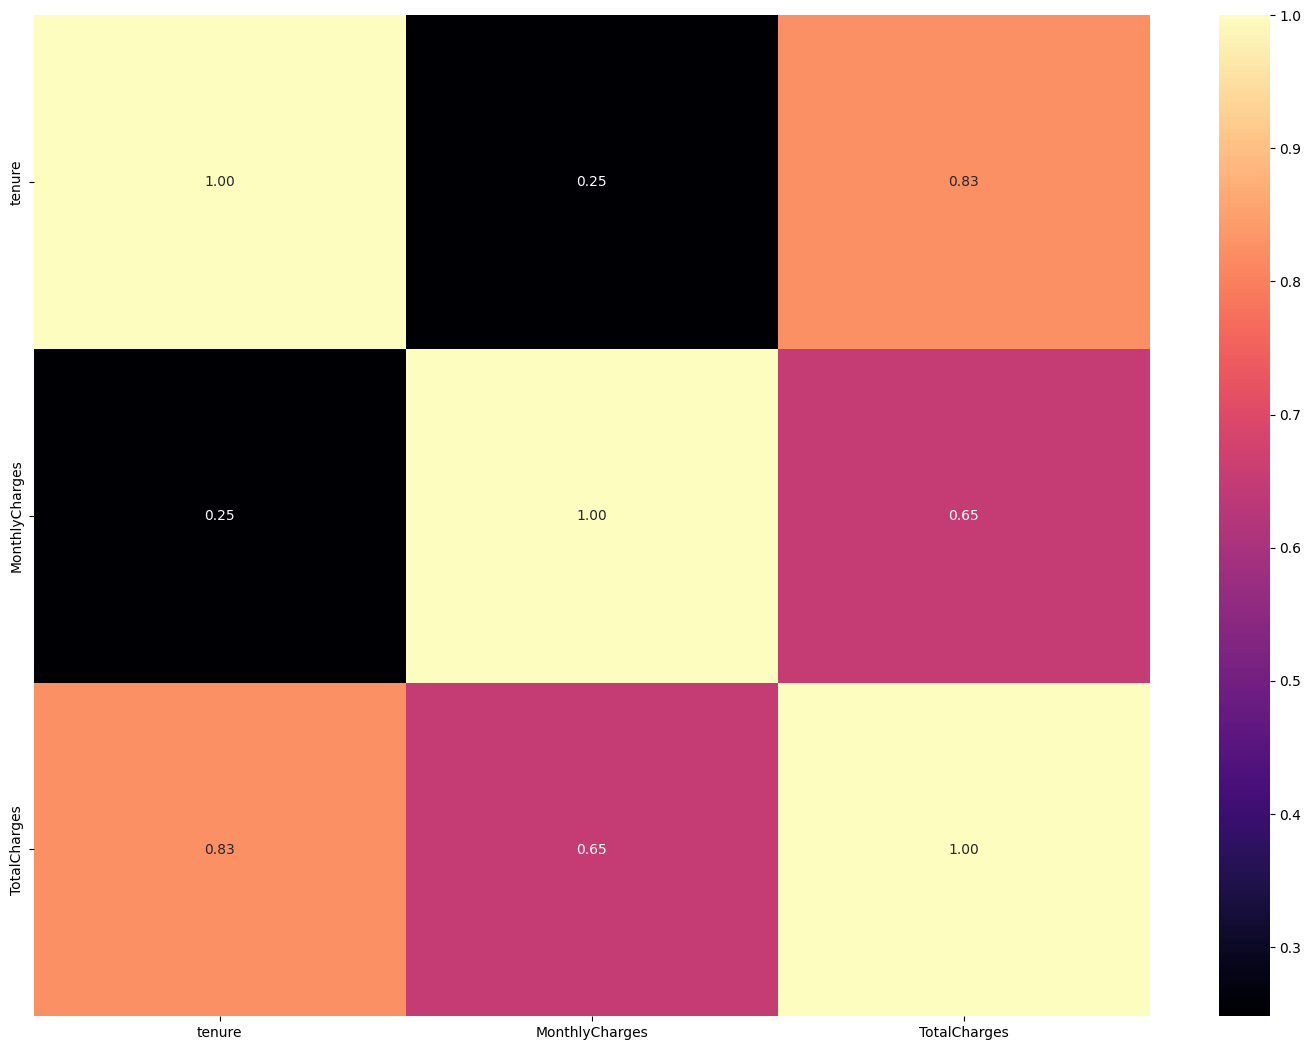

In [20]:
#correlatoin matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(lim[number_columns].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
plt.show(block=True)

In [21]:
print(lim.isnull().sum()) #verifying the null values in data
lim["TotalCharges"].fillna(0, inplace=True) #using fillna filling the null values with zero
lim.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
dff = lim.copy()
category_columns = [i for i in category_columns if i not in ["Churn"]]
category_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [24]:
# performing onehotencoding to category_data
def onehot_e(base, c_c, drop_first=False):
    m = pd.get_dummies(base, columns=c_c, drop_first=drop_first)
    return m

In [25]:
dff = onehot_e(dff, category_columns, drop_first=True)

In [26]:
y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

In [27]:
# train and test the data set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [31]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


In [33]:
from catboost import CatBoostClassifier
c_b_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train) #using chatboost library predicting the model
predection = c_b_model.predict(X_test)

In [35]:
# printing out the accuracy, precision and recall of the model
print(f"Acc: {round(accuracy_score(predection, y_test), 4)}")
print(f"Recall: {round(recall_score(predection,y_test),4)}")
print(f"Preci: {round(precision_score(predection,y_test), 4)}")
print(f"F_1: {round(f1_score(predection,y_test), 4)}")
print(f"A_c: {round(roc_auc_score(predection,y_test), 4)}")

Acc: 0.7922
Recall: 0.6517
Preci: 0.5052
F_1: 0.5692
A_c: 0.7407
